# plt_colors


## TO-DO 
1. en show_plt_palettes que me permita ingresar la/las paleta como argumento
- por qué quiero hacer esto?:
    1. Para ver si ciertas paletas existen de modo de:
    2. Determinar todas las paletas secuenciales para:
    3. Que en el pie chart las NO secuenciales NO eliminen los extremos
- igual, YA VEREMOS, porque por ahí lo que conviene es UNICAMENTE eliminar los extremos si la palette NO ES Qualitative
1. También el show palettes que me muestre las listas escritas listas COMPLETAS (no solo las que se muestran)

In [86]:
# Standard Libs
from typing import Optional, Union
import random
import textwrap

# Third-Party Libs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Local Libs
from jm_utils.data import plt_functions as plt_func
from jm_utils.data.plt_functions import to_series

plt_func.__version__

'0.1.0'

In [87]:
# dir(plt_func)
# fig = plt_func.show_plt_palettes('Cyclic')

In [88]:
    sequential = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 
                 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    
    print("Secuenciales:")
    print(sequential)
    print()
    
    # Colormaps divergentes
    diverging = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
                'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
    
    print("Divergentes:")
    print(diverging)
    print()
    
    # Colormaps cualitativos
    qualitative = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                  'Dark2', 'Set1', 'Set2', 'Set3',
                  'tab10', 'tab20', 'tab20b', 'tab20c']

Secuenciales:
['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

Divergentes:
['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']



## Show Palettes - Modificaciones
1. Que permita el ingreso de la o las paletas que se quieren ver - YA ESTANA je!!
    - Si ingresas una lista en vez de un string!!!
2. Que imprima las lista de nombres completas 

In [92]:
def get_color_list(palette: str, n_colors: Optional[int] = 10) -> list[str]:
    """
    Returns a list of hex color codes from a specified Matplotlib colormap or a named palette.

    This function generates a list of colors suitable for data visualization. It supports
    custom Matplotlib colormaps and a predefined 'colorblind' palette optimized for
    accessibility.

    Parameters:
        palette (str): Name of the colormap or palette to use. Special value:
            - 'colorblind': Returns a predefined colorblind-safe palette.
            - Any other string: Interpreted as a Matplotlib colormap (e.g., 'viridis', 'plasma').

        n_colors (int, optional): Number of colors to generate from the colormap.
            Ignored if palette is 'colorblind' (which returns a fixed set).
            Default is 10.

    Returns:
        list[str]: A list of hexadecimal color codes (e.g., '#0173B2').

    Raises:
        ValueError: If the specified Matplotlib colormap does not exist.
        TypeError: If `n_colors` is not a number.

    Notes:
        - For the 'colorblind' palette, the function returns a fixed set of 30 colors.
          If more than 30 are requested, they will be truncated.
        - Uses `matplotlib.pyplot.get_cmap` and `matplotlib.colors.rgb2hex` internally.
        - Ideal for use in custom plotting functions requiring consistent, accessible color schemes.

    Example:
        >>> get_color_list('viridis', 3)
        ['#440154', '#21908C', '#FDE725']

        >>> get_color_list('colorblind', 5)
        ['#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC']
    """
    if palette == 'colorblind':
        return [
            '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC',
            '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9',
            '#5D8C3B', '#A93967', '#888888', '#FFC107', '#7C9680',
            '#E377C2', '#BCBD22', '#AEC7E8', '#FFBB78', '#98DF8A',
            '#FF9896', '#C5B0D5', '#C49C94', '#F7B6D2', '#DBDB8D',
            '#9EDAE5', '#D68E3A', '#A65898', '#B2707D', '#8E6C87'
        ]
    else:
        cmap = plt.get_cmap(palette)                        # Get the colormap
        colors_normalized = np.linspace(0, 1, n_colors)     # Generate equidistant points between 0 and 1
        colors_rgba = cmap(colors_normalized)               # Get the colors from colormap
        return [mcolors.rgb2hex(color[:3]) for color in colors_rgba]
    

def show_plt_palettes(
        palette_group: Union[str, list[str]] = 'Sample',
        n_colors: Optional[int] = 14,
) -> plt.Figure:
    
    # First verified n_colors parameter (cause validation and prerprecess palette_group parameter need more data)
    if not isinstance(n_colors, (int, float)):
        raise TypeError(f"'n_items' parameter not valid. Must be an int or float. Got '{type(n_colors)}'.")

    if n_colors < 1 or n_colors > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_colors}'.")
    n_colors = int(n_colors) + 1
    
    # Known matplotlib palette group lists - 'colorblind' in Qualitatives is jm addition
    Qualitative = ['Accent', 'colorblind', 'Dark2', 'Dark2_r', 'flag', 'Paired', 'Pastel1', 'Pastel2',
                    'prism', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

    Sequential = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'GnBu',
              'Greens', 'Greys', 'Greys_r', 'gnuplot', 'inferno', 'magma', 'ocean', 'Oranges',
                'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds', 'terrain', 'viridis', 'Wistia']

    Diverging = ['BrBG', 'BrBG_r', 'bwr', 'bwr_r', 'coolwarm', 'PiYG', 'PiYG_r', 'PRGn',
                 'PRGn_r', 'PuOr', 'PuOr_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdYlBu',
                 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'seismic', 'Spectral', 'Spectral_r']

    Cyclic = ['berlin', 'berlin_r', 'cubehelix', 'cubehelix_r', 'flag_r', 'gist_rainbow', 'gist_rainbow_r', 'hsv',
              'hsv_r', 'jet', 'jet_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'rainbow',
              'rainbow_r', 'twilight', 'twilight_r','twilight_shifted', 'turbo', 'turbo_r', 'vanimo', 'vanimo_r']
    
    Custom = []     # User Custom palette list born empty. It will take the value entered by the user if the user enters a list as palette_group parameter

    Sample = [palette for p_g in [Qualitative, Sequential, Diverging, Cyclic] for palette in random.sample(p_g, k=6)]   # Sample list w/random six of each known group
    
    # Palette group dict: p_g_key: (p_g_list, p_g_desc). To show the palette goup (and desc) based on 'palette_group' parameter
    palette_group_dic = {
        'Qualitative': (Qualitative, 'for categorical data'),
        'Sequential': (Sequential, 'for data that has an order'),
        'Diverging': (Diverging, 'for data that have a significant midpoint'),
        'Cyclic': (Cyclic, 'for data that repeats, such as angles or phases'),
        'Custom': (Custom, 'user selected palettes'),
        'Sample': (Sample, 'a sample of six of each category')
    }

    # Internal auxiliar function to print list names
    def _show_dic(dic):
        for group_name, (palette_list, description) in dic.items():
            print(f"\n# {group_name} - {description}:")
            print(textwrap.fill(", ".join(palette_list), width=90, initial_indent="    ", subsequent_indent="    "))
    
    # Validate an preprocess palette_group parameter: get the palette_group_key, print lists/names if selected, or fill custom list
    if isinstance(palette_group, str):          
        palette_group_key = palette_group.strip().capitalize()
        if palette_group_key == 'Names':
            _show_dic(palette_group_dic)
            return
        elif palette_group_key not in palette_group_dic.keys():
            raise ValueError(f"Invalid value for 'palette_group': {repr(palette_group)}. Expected one of: 'cyclic', 'civerging', 'names', 'qualitative', 'sample', 'sequential'.")   
    elif isinstance(palette_group, list):
        palette_group_key = 'Custom'
        Custom = palette_group                  # La lista de palettas ingresadas se etiqueta tamibién como 'Custom'
    else:
        raise TypeError(f"'palette_group' parameter not valid. Must be a string or a list. Got {type(palette_group)}.")

    # Verified n_colors parameter
    if not isinstance(n_colors, (int, float)):
        raise TypeError(f"'n_items' parameter not valid. Must be an int or float. Got '{type(n_colors)}'.")

    if n_colors < 1 or n_colors > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_colors}'.")
    n_colors = int(n_colors) + 1

    # Get the selected_group and selected_group_desc (description), the ones tha will be displayed                           
    selected_group, selected_group_desc = palette_group_dic[palette_group_key]

    # Build a Series of n_items elements to show colors
    sr = to_series({str(i): 1 for i in range(1, n_colors)})

    # Create a figure with two columns for the palettes - Bar charts showing palette colors
    rows = len(selected_group) // 2 if len(selected_group) % 2 == 0 else (len(selected_group) // 2) + 1
    width = 12                                              # Ancho fijo en 12 por ahora (se puede analizar hacerlo proporcional a n_colors?)
    height = rows / 1.25 if rows > 6 else rows / 1.05       # Para evitar superposición de axes cuando son pocas filas
    
    fig, axs = plt.subplots(rows, 2, figsize=(width, height), tight_layout=True, sharex=True)

    # Set the figure title with the palette group key and description
    fig.suptitle(f"Matplolib {palette_group_key} palettes (cmap): {selected_group_desc}", fontsize=14, fontweight='medium', y=1.001)

    if palette_group_key == 'Sample':
        fig.text(0.15, 0.95, "4 Qualitative (for categorical data), 4 Sequential (for ordered data),"
                             "4 Diverging (significant midpoint), and 4 Cyclic (for repeated data)",
                    fontsize=10, transform=fig.transFigure)

    # Iterate over the axes and palette group to plot each palette                                           
    for ax, pltt in zip(axs.flatten(), selected_group):
        try:
            color_list = get_color_list(pltt, n_colors)
            ax.bar(sr.index, sr, color=color_list, width=1, edgecolor='white', linewidth=0.2)
            ax.set_xlim(-0.5, n_colors - 1.5)
            ax.set_ylim(0, 0.1)
            ax.set_title(pltt, loc='left', fontsize=10, fontweight='medium')
        except ValueError:
            err_msg = f"'{pltt}' is not currently a valid Matplotlib palette (cmap)"
            ax.set_title(err_msg, loc='left', fontsize=10, fontweight='medium', color='red')

        ax.set_yticks([])       # Hide y-ticks for cleaner look
        ax.set_xticks([])       # Hide x-ticks

    plt.show()
    return fig                  # Return the current figure for further manipulation if needed

In [95]:
# fig = show_plt_palettes(['PiYG', 'PRGn', 'BrBG', 'PuOr'])
fig = show_plt_palettes('names')


# Qualitative - for categorical data:
    Accent, colorblind, Dark2, Dark2_r, flag, Paired, Pastel1, Pastel2, prism, Set1, Set2,
    Set3, tab10, tab20, tab20b, tab20c

# Sequential - for data that has an order:
    autumn, binary, Blues, brg, BuPu, cividis, cool, GnBu, Greens, Greys, Greys_r,
    gnuplot, inferno, magma, ocean, Oranges, OrRd, plasma, PuRd, Purples, Reds, terrain,
    viridis, Wistia

# Diverging - for data that have a significant midpoint:
    BrBG, BrBG_r, bwr, bwr_r, coolwarm, PiYG, PiYG_r, PRGn, PRGn_r, PuOr, PuOr_r, RdBu,
    RdBu_r, RdGy, RdGy_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, seismic, Spectral,
    Spectral_r

# Cyclic - for data that repeats, such as angles or phases:
    berlin, berlin_r, cubehelix, cubehelix_r, flag_r, gist_rainbow, gist_rainbow_r, hsv,
    hsv_r, jet, jet_r, managua, managua_r, nipy_spectral, nipy_spectral_r, rainbow,
    rainbow_r, twilight, twilight_r, twilight_shifted, turbo, turbo_r, vanimo, vanimo_r

# Custom - user selected palet

In [91]:
l = [i + 1 for i in range(10)]
l[1:-1]

[2, 3, 4, 5, 6, 7, 8, 9]

In [75]:
# Known matplotlib palette group lists - 'colorblind' in Qualitatives is jm addition
Qualitative = ['Accent', 'colorblind', 'Dark2', 'Dark2_r', 'flag', 'Paired', 'Pastel1', 'Pastel2',
                'prism', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

Sequential = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'GnBu',
            'Greens', 'Greys', 'Greys_r', 'gnuplot', 'inferno', 'magma', 'ocean', 'Oranges',
            'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds', 'terrain', 'viridis', 'Wistia']

Diverging = ['BrBG', 'BrBG_r', 'bwr', 'bwr_r', 'coolwarm', 'PiYG', 'PiYG_r', 'PRGn',
                'PRGn_r', 'PuOr', 'PuOr_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdYlBu',
                'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'seismic', 'Spectral', 'Spectral_r']

Cyclic = ['berlin', 'berlin_r', 'cubehelix', 'cubehelix_r', 'flag_r', 'gist_rainbow', 'gist_rainbow_r', 'hsv',
            'hsv_r', 'jet', 'jet_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'rainbow',
            'rainbow_r', 'twilight', 'twilight_r','twilight_shifted', 'turbo', 'turbo_r', 'vanimo', 'vanimo_r']

Custom = []     # User Custom palette list born empty. It will take the value entered by the user if the user enters a list as palette_group parameter

Sample = [palette for p_g in [Qualitative, Sequential, Diverging, Cyclic] for palette in random.sample(p_g, k=6)]   # Sample list w/random four of each known group

# Palette group dict: p_g_key: (p_g_list, p_g_desc). To show the palette goup (and desc) based on 'palette_group' parameter
palette_group_dic = {
    'Qualitative': (Qualitative, 'for categorical data'),
    'Sequential': (Sequential, 'for data that has an order'),
    'Diverging': (Diverging, 'for data that have a significant midpoint'),
    'Cyclic': (Cyclic, 'for data that repeats, such as angles or phases'),
    'Custom': (Custom, 'user selected palettes'),
    'Sample': (Sample, 'a random sample of six of each category')
}

In [76]:
def show_dic0(dic):
    res = ''
    for k, v in dic.items():
        len_lst = len(v)
        res += f''' - {k} ({len_lst}):\n'''
        for i in range(len_lst):
            res += f'''   {i+1} {v[i]}\n'''
        res += '\n'
    return res

def show_dic(dic):
    res = ''
    for k, v in dic.items():
        res += f"\n# {k} - {v[1]}:\n    "
        for i, pltt in enumerate(v[0]):
            res += f"{pltt}, "
            if (i + 1) % 10 == 0:
                res += "\n    "
        res += "\n"
    
    print(res)

In [77]:
show_dic(palette_group_dic)


# Qualitative - for categorical data:
    Accent, colorblind, Dark2, Dark2_r, flag, Paired, Pastel1, Pastel2, prism, Set1, 
    Set2, Set3, tab10, tab20, tab20b, tab20c, 

# Sequential - for data that has an order:
    autumn, binary, Blues, brg, BuPu, cividis, cool, GnBu, Greens, Greys, 
    Greys_r, gnuplot, inferno, magma, ocean, Oranges, OrRd, plasma, PuRd, Purples, 
    Reds, terrain, viridis, Wistia, 

# Diverging - for data that have a significant midpoint:
    BrBG, BrBG_r, bwr, bwr_r, coolwarm, PiYG, PiYG_r, PRGn, PRGn_r, PuOr, 
    PuOr_r, RdBu, RdBu_r, RdGy, RdGy_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, seismic, 
    Spectral, Spectral_r, 

# Cyclic - for data that repeats, such as angles or phases:
    berlin, berlin_r, cubehelix, cubehelix_r, flag_r, gist_rainbow, gist_rainbow_r, hsv, hsv_r, jet, 
    jet_r, managua, managua_r, nipy_spectral, nipy_spectral_r, rainbow, rainbow_r, twilight, twilight_r, twilight_shifted, 
    turbo, turbo_r, vanimo, vanimo_r, 

# Custom - user

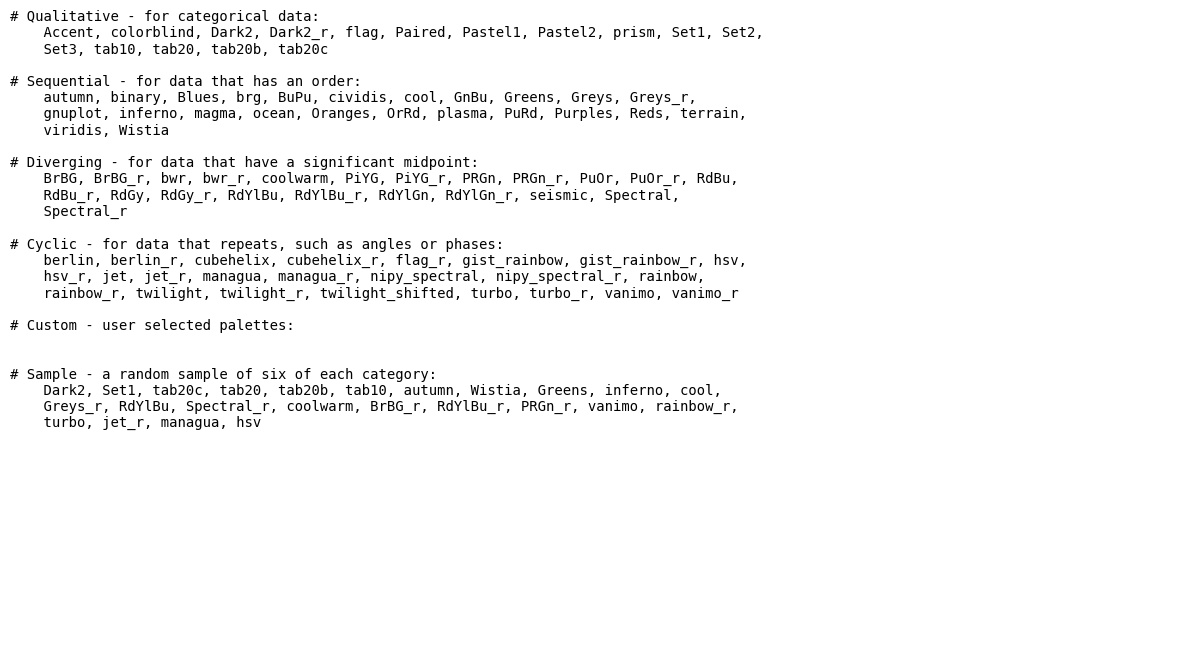

In [97]:
import matplotlib.pyplot as plt
import textwrap

def show_dic_as_figure(dic):
    """
    Muestra el contenido del diccionario de paletas en una figura matplotlib.
    """
    # Construimos el texto completo
    all_text = ""
    for group_name, (palette_list, description) in dic.items():
        all_text += f"# {group_name} - {description}:\n"
        wrapped = textwrap.fill(
            ", ".join(palette_list),
            width=90,
            initial_indent="    ",
            subsequent_indent="    "
        )
        all_text += wrapped + "\n\n"

    # Crear la figura
    fig, ax = plt.subplots(figsize=(12, len(all_text.splitlines()) * 0.25))
    ax.axis("off")  # Oculta ejes
    ax.text(
        0, 1, all_text,
        fontsize=10,
        va="top", ha="left",
        family="monospace"
    )

    plt.tight_layout()
    plt.show()

fig = show_dic_as_figure(palette_group_dic)

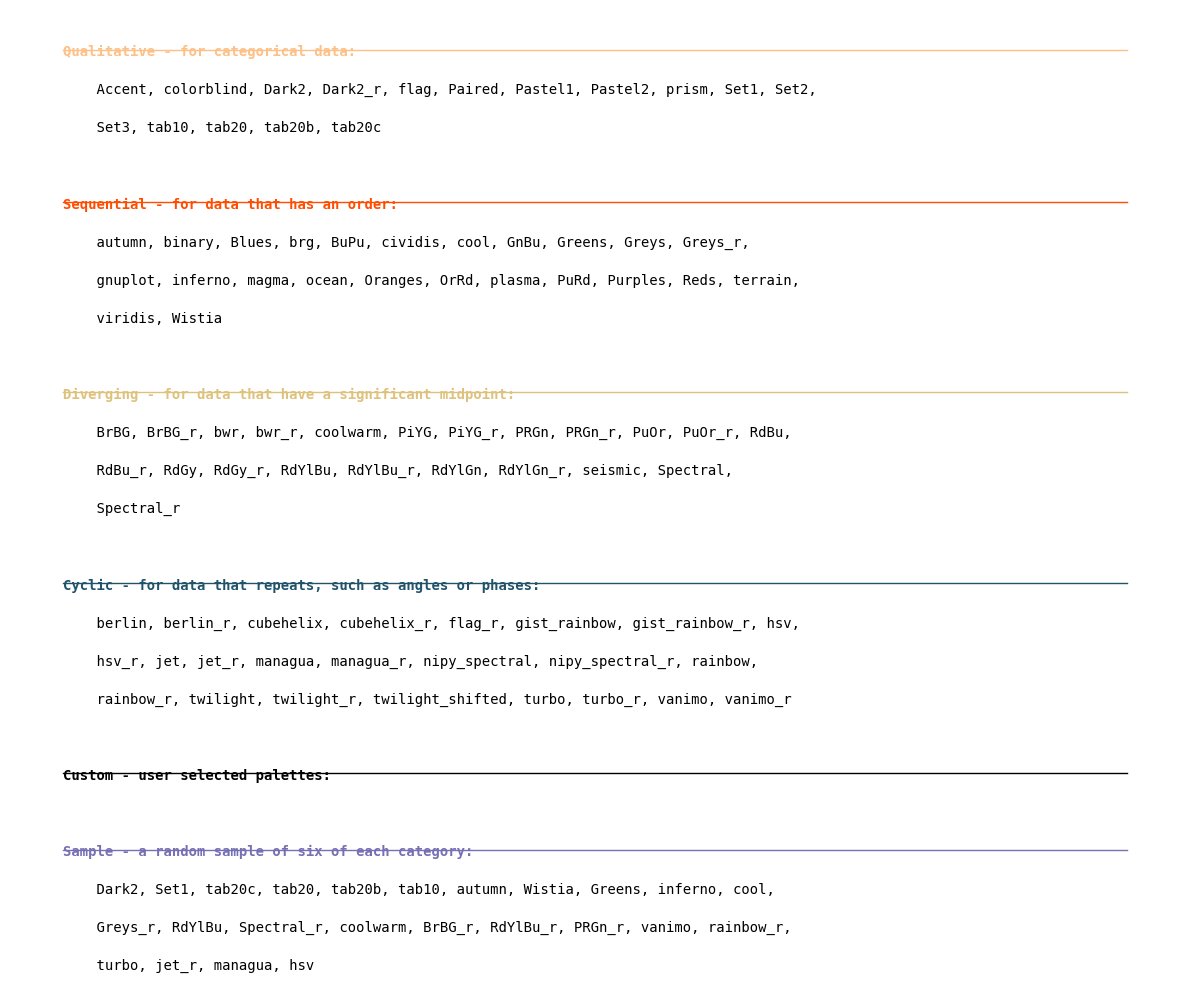

In [100]:
import matplotlib.pyplot as plt
import textwrap

def show_dic_as_figure_colored(dic, sample_color_index=3):
    """
    Muestra el contenido del diccionario de paletas en una figura matplotlib
    con nombres de grupo coloreados y subrayados.
    """
    # Definir colores característicos para cada grupo
    group_colors = {}
    for group_name, (palette_list, _) in dic.items():
        if palette_list:  # si hay paletas, tomamos un color de ejemplo
            cmap = plt.get_cmap(palette_list[0])
            group_colors[group_name] = cmap(sample_color_index / 10)  # color del medio
        else:
            group_colors[group_name] = "black"  # por si está vacío

    # Preparar líneas de texto
    all_lines = []
    for group_name, (palette_list, description) in dic.items():
        # Título
        title_text = f"{group_name} - {description}:"
        wrapped_list = textwrap.fill(
            ", ".join(palette_list),
            width=90,
            initial_indent="    ",
            subsequent_indent="    "
        )
        all_lines.append((title_text, group_colors[group_name], True))  # True = subrayado
        for line in wrapped_list.splitlines():
            all_lines.append((line, "black", False))
        all_lines.append(("", "black", False))  # línea en blanco

    # Crear figura
    fig, ax = plt.subplots(figsize=(12, len(all_lines) * 0.35))
    ax.axis("off")

    # Dibujar texto y subrayados
    y = 1.0
    line_height = 1 / len(all_lines)
    for text, color, underline in all_lines:
        ax.text(
            0, y, text,
            fontsize=10,
            va="top", ha="left",
            color=color,
            family="monospace",
            fontweight="bold" if underline else "normal"
        )
        # Subrayado con línea horizontal
        if underline and text:
            ax.plot([0, 0.9], [y - 0.005, y - 0.005], color=color, linewidth=1)
        y -= line_height

    plt.tight_layout()
    plt.show()


fig = show_dic_as_figure_colored(palette_group_dic)


In [85]:
import textwrap  # Standard library

def show_dic(dic):
    for group_name, (palette_list, description) in dic.items():
        print(f"\n# {group_name} - {description}:")
        formatted = textwrap.fill(
            ", ".join(palette_list),
            width=90,                 # ancho máximo de línea
            initial_indent="    ",    # sangría de la primera línea
            subsequent_indent="    "  # sangría de las líneas siguientes
        )
        print(formatted)

show_dic(palette_group_dic)


# Qualitative - for categorical data:
    Accent, colorblind, Dark2, Dark2_r, flag, Paired, Pastel1, Pastel2, prism, Set1, Set2,
    Set3, tab10, tab20, tab20b, tab20c

# Sequential - for data that has an order:
    autumn, binary, Blues, brg, BuPu, cividis, cool, GnBu, Greens, Greys, Greys_r,
    gnuplot, inferno, magma, ocean, Oranges, OrRd, plasma, PuRd, Purples, Reds, terrain,
    viridis, Wistia

# Diverging - for data that have a significant midpoint:
    BrBG, BrBG_r, bwr, bwr_r, coolwarm, PiYG, PiYG_r, PRGn, PRGn_r, PuOr, PuOr_r, RdBu,
    RdBu_r, RdGy, RdGy_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, seismic, Spectral,
    Spectral_r

# Cyclic - for data that repeats, such as angles or phases:
    berlin, berlin_r, cubehelix, cubehelix_r, flag_r, gist_rainbow, gist_rainbow_r, hsv,
    hsv_r, jet, jet_r, managua, managua_r, nipy_spectral, nipy_spectral_r, rainbow,
    rainbow_r, twilight, twilight_r, twilight_shifted, turbo, turbo_r, vanimo, vanimo_r

# Custom - user selected palet

In [82]:
import textwrap

def show_dic(dic):
    for k, v in dic.items():
        print(f"\n# {k} - {v[1]}:")
        print(textwrap.fill(", ".join(v[0]), width=90, subsequent_indent="    "))

show_dic(palette_group_dic)



# Qualitative - for categorical data:
Accent, colorblind, Dark2, Dark2_r, flag, Paired, Pastel1, Pastel2, prism, Set1, Set2,
    Set3, tab10, tab20, tab20b, tab20c

# Sequential - for data that has an order:
autumn, binary, Blues, brg, BuPu, cividis, cool, GnBu, Greens, Greys, Greys_r, gnuplot,
    inferno, magma, ocean, Oranges, OrRd, plasma, PuRd, Purples, Reds, terrain, viridis,
    Wistia

# Diverging - for data that have a significant midpoint:
BrBG, BrBG_r, bwr, bwr_r, coolwarm, PiYG, PiYG_r, PRGn, PRGn_r, PuOr, PuOr_r, RdBu,
    RdBu_r, RdGy, RdGy_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, seismic, Spectral,
    Spectral_r

# Cyclic - for data that repeats, such as angles or phases:
berlin, berlin_r, cubehelix, cubehelix_r, flag_r, gist_rainbow, gist_rainbow_r, hsv,
    hsv_r, jet, jet_r, managua, managua_r, nipy_spectral, nipy_spectral_r, rainbow,
    rainbow_r, twilight, twilight_r, twilight_shifted, turbo, turbo_r, vanimo, vanimo_r

# Custom - user selected palettes:


# Sample 

In [84]:
def show_dic(dic, n_colors=8):
    """
    Muestra los grupos de paletas con descripción y 
    una franja de colores por cada paleta.
    """
    for group_name, (palette_list, description) in dic.items():
        print(f"\n# {group_name} - {description}:")

        for palette_name in palette_list:
            try:
                # Obtener colores de la paleta
                cmap = plt.get_cmap(palette_name)
                colors = cmap(range(n_colors))

                # Crear franja visual
                fig, ax = plt.subplots(figsize=(n_colors, 0.5))
                ax.imshow([colors], aspect='auto')
                ax.set_axis_off()
                ax.set_title(palette_name, fontsize=8, pad=2)
                plt.show()

            except ValueError:
                # Paleta no encontrada en Matplotlib
                print(f"  [!] '{palette_name}' no es una paleta reconocida por matplotlib.")


# show_dic(palette_group_dic)

In [41]:
res = ''
for i in range(26):
    res += f"{i} "
    if i % 8 == 0 and i != 0:
        res += "\n"
print(res)

0 1 2 3 4 5 6 7 8 
9 10 11 12 13 14 15 16 
17 18 19 20 21 22 23 24 
25 
